In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [7]:
abengers_df=pd.read_csv('./archive/charcters_stats.csv')
abengers_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [8]:
abengers_total=abengers_df.sort_values(by=['Total'], axis=0,ascending=False).head(10)
abengers_total

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
525,Stardust,good,88,85,100,110,100,85,568
238,Galactus,neutral,100,100,83,100,100,70,553
82,Bizarro,neutral,75,95,100,100,95,85,550
203,Dormammu,bad,88,95,83,100,100,80,546
546,Thor,good,69,100,92,100,100,85,546


# top 20의 total status

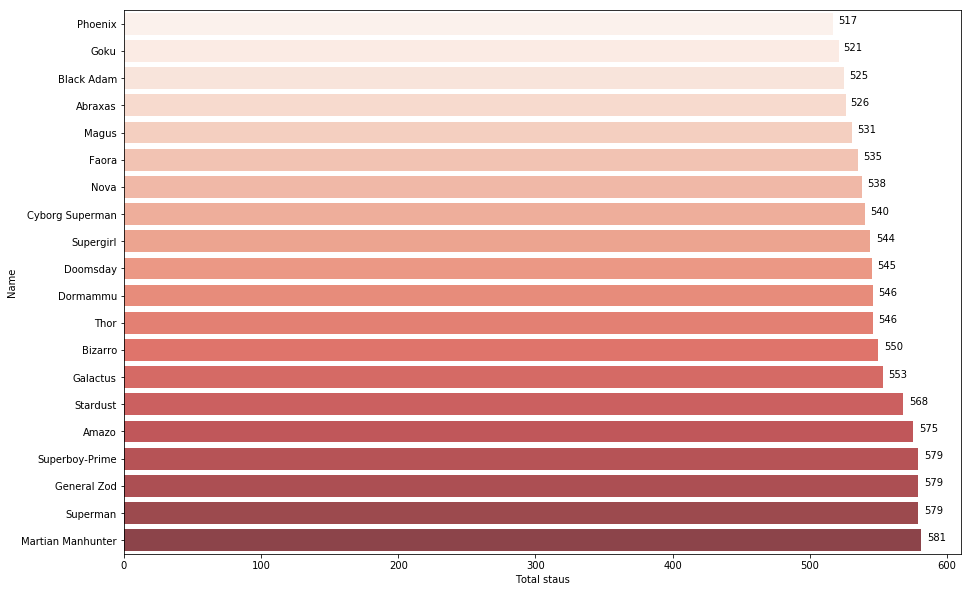

In [9]:
abengers_total=abengers_df.sort_values(by=['Total'], axis=0).tail(20)#,ascending=False
plt.figure(figsize=(15,10))
g=sns.barplot(x="Total", y="Name", data=abengers_total,alpha=0.8, palette='Reds')
ax=g
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(width), (width*1.02,bottom+height/2),ha='center') 

plt.xlabel('Total staus')
plt.show()

In [10]:
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# top 5 의 status

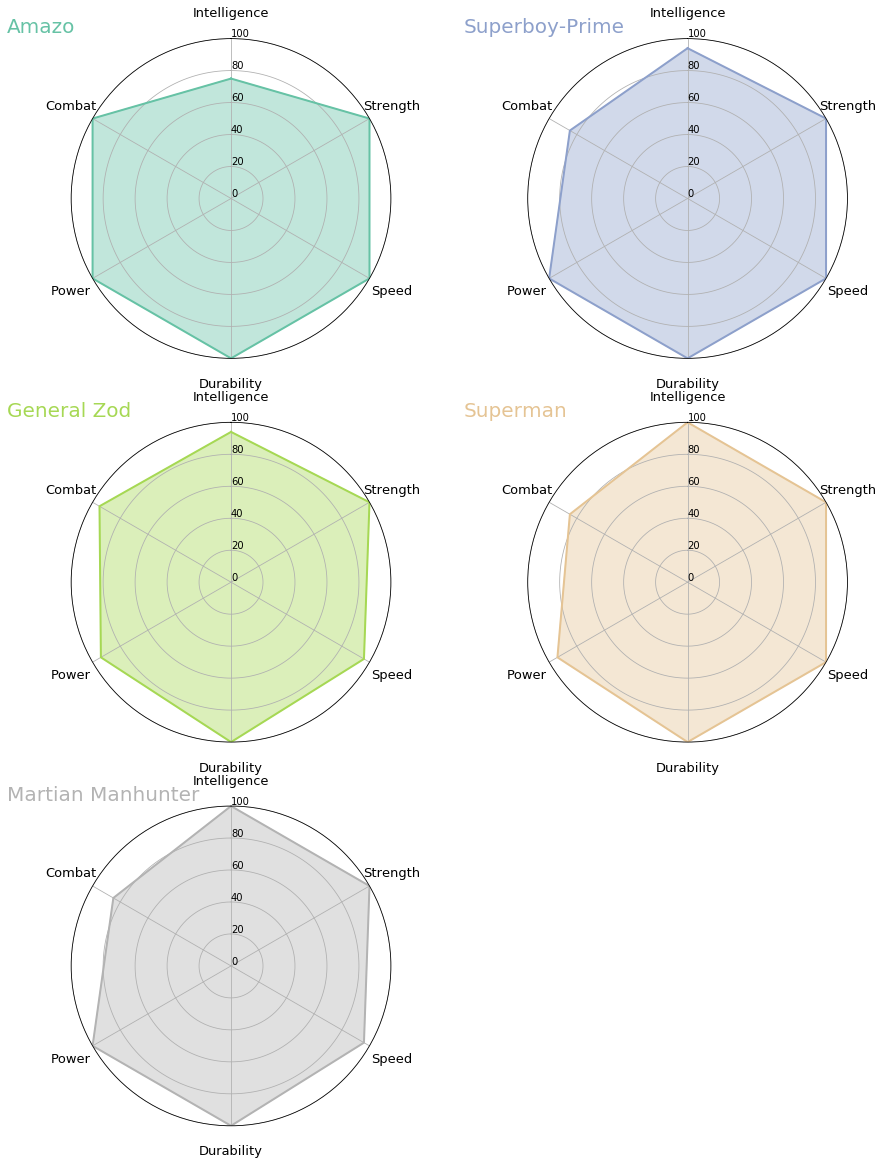

In [69]:
abengers_total_top5=abengers_df.sort_values(by=['Total'], axis=0).tail(5)#,ascending=False
abengers_total_top5=abengers_total_top5.reset_index(drop=True)

labels = abengers_total_top5.columns[2:-1]
num_labels = len(labels)


angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

my_palette = plt.cm.get_cmap("Set2", len(abengers_total_top5.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in abengers_total_top5.iterrows():
    color = my_palette(i)
    #data = abengers_total.iloc[i].drop(['Name','Alignment','Total']).tolist()
    data = abengers_total_top5.iloc[i].drop(['Name','Alignment','Total']).tolist()
    data += data[:1]

    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,20,40,60,80,100],['0','20','40','60','80','100'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,100)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    
    plt.title(row.Name, size=20, color=color,x=-0.2, y=1, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
    


# Under 5의 status를 알아볼까

- Under의 능력치가 10단위 이하라 단위도 10으로 설정....

In [70]:
abengers_total_under5=abengers_df.sort_values(by=['Total'], axis=0).head(5)#,ascending=False
abengers_total_under5=abengers_total_under5.reset_index(drop=True)
abengers_total_under5

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,Cerebra,good,1,1,1,1,0,1,5
1,Cheetah II,bad,1,1,1,1,0,1,5
2,Cheetah III,bad,1,1,1,1,0,1,5
3,Chromos,bad,1,1,1,1,0,1,5
4,Clea,good,1,1,1,1,0,1,5


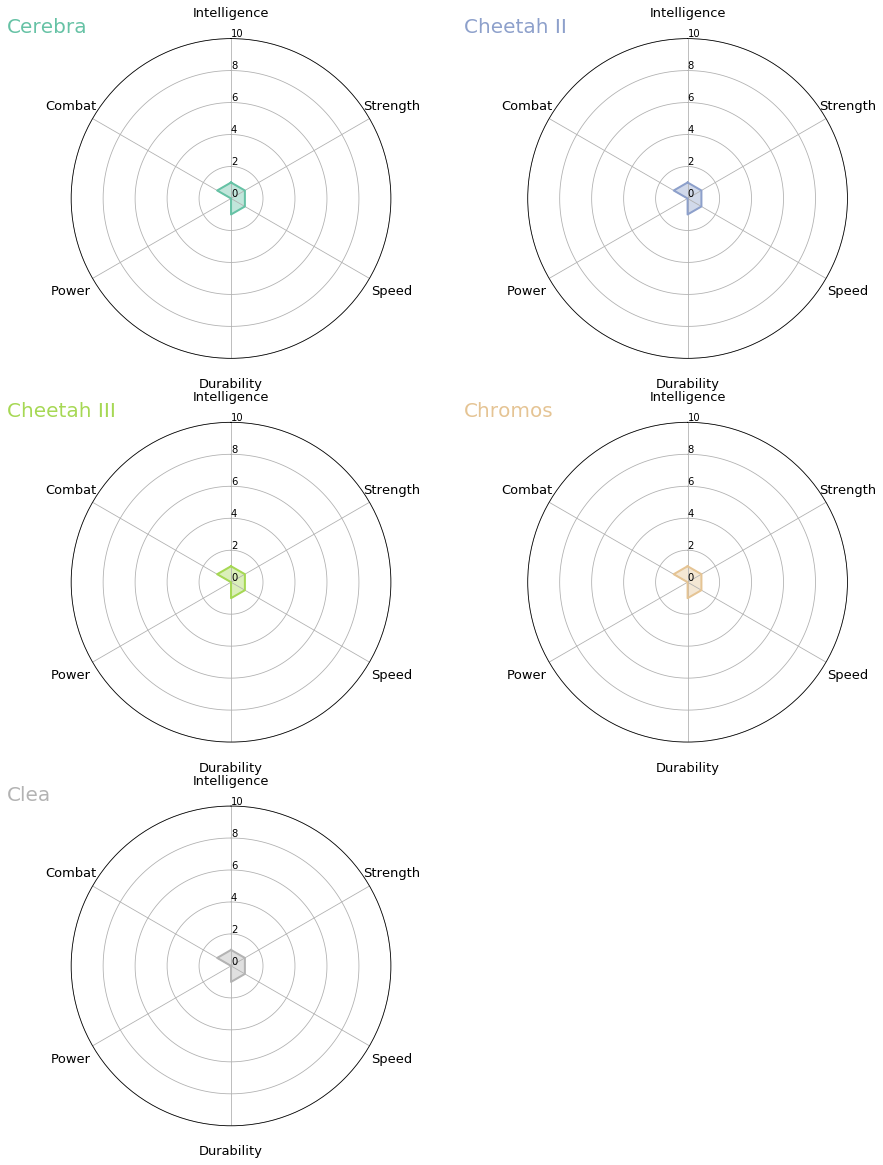

In [75]:
abengers_total_under5=abengers_df.sort_values(by=['Total'], axis=0).head(5)#,ascending=False
abengers_total_under5=abengers_total_under5.reset_index(drop=True)

labels = abengers_total_under5.columns[2:-1]
num_labels = len(labels)


angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

my_palette = plt.cm.get_cmap("Set2", len(abengers_total_under5.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in abengers_total_under5.iterrows():
    color = my_palette(i)
    data = abengers_total_under5.iloc[i].drop(['Name','Alignment','Total']).tolist()
    data += data[:1]

    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    
    plt.title(row.Name, size=20, color=color,x=-0.2, y=1, ha='left') ## 타이틀은 캐릭터 클래스로 한다.

In [67]:
abengers_total_under5=abengers_df.sort_values(by=['Total'], axis=0).head(5)#,ascending=False
abengers_total_under5=abengers_total_under5.reset_index(drop=True)

In [68]:
abengers_total_under5

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,Cerebra,good,1,1,1,1,0,1,5
1,Cheetah II,bad,1,1,1,1,0,1,5
2,Cheetah III,bad,1,1,1,1,0,1,5
3,Chromos,bad,1,1,1,1,0,1,5
4,Clea,good,1,1,1,1,0,1,5
